In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("pokemon.csv",index_col='#')

In [3]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


In [5]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

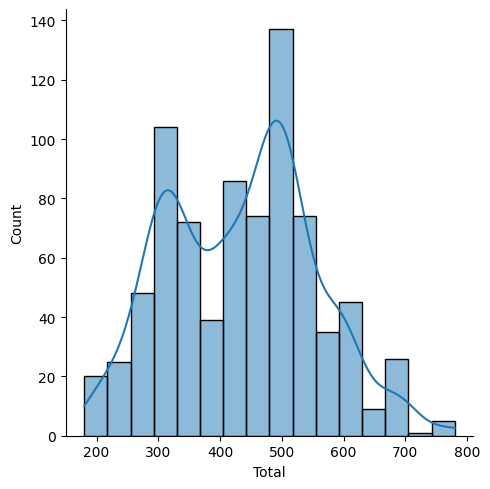

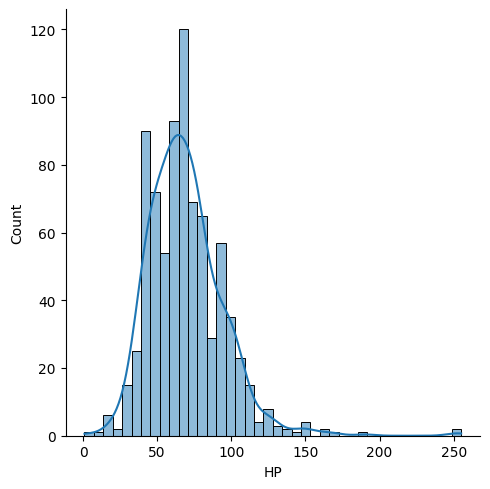

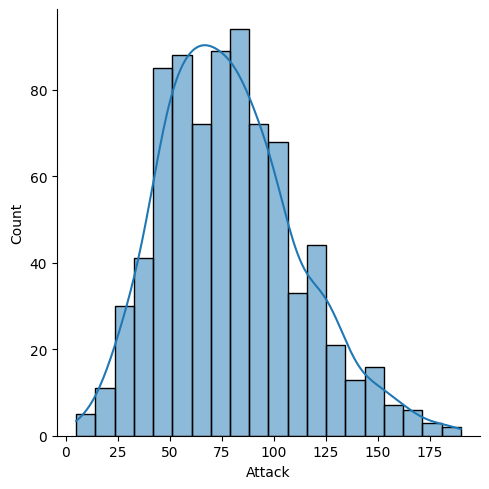

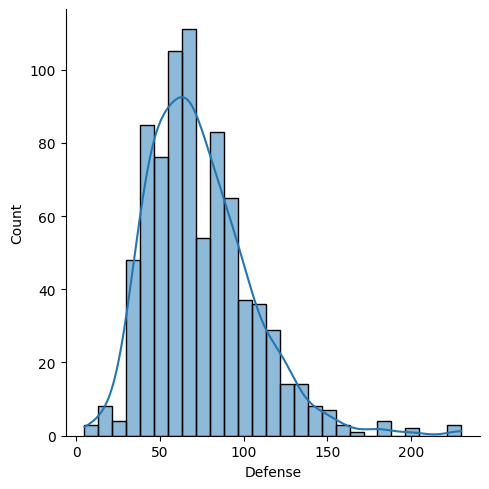

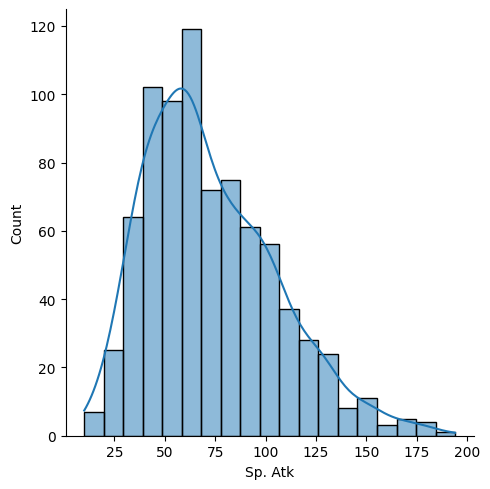

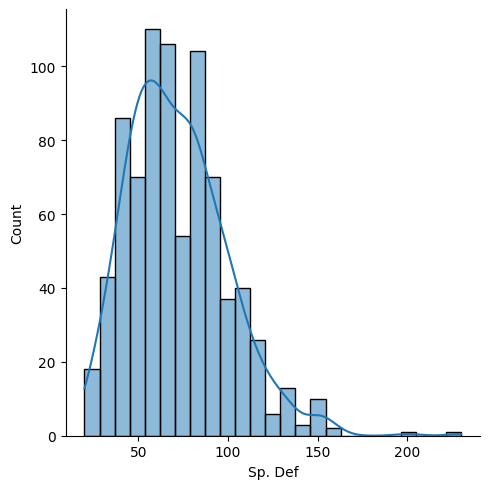

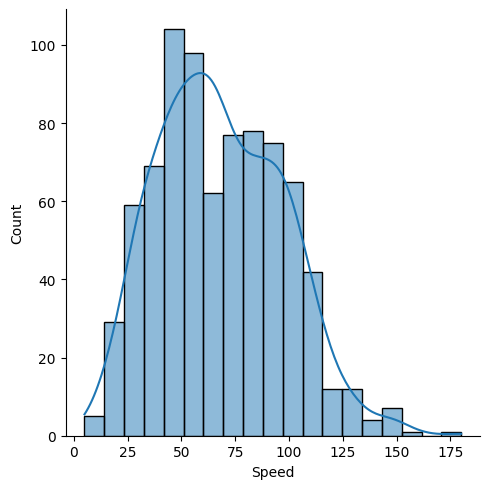

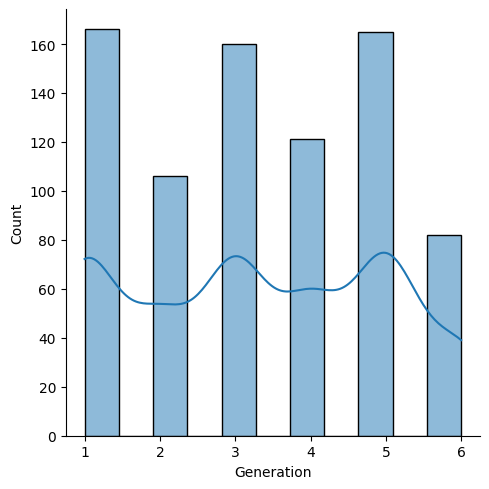

In [7]:
# Did this step to look ro check for the distribution followed by each column.
# Found that the Attack column is the closest from the array that can be caonsidered Normally Distributed.
for x in ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation']:
    sns.displot(data = df[x] , kde = True)

In [8]:
# Now we are doing outlier analysis in which we detect the outliers and we will discuss strategies to eliminate it from the dataset for that column/s respectively. 
# First we are gonna look at the simplest method where we know in a Normal Distribution almost 95% of the value is stored from mu(mean) +- 3 sigma(std) from both the sides .
# This helps us create a boundary  for outliers and any values outside this domain will be treated as an outlier and will be removed . 

# Here we will transform the 'Attack' Column using its mean and std. 
attack_mean,attack_std = df['Attack'].mean(),df['Attack'].std()
attack_mean,attack_std

(np.float64(79.00125), np.float64(32.45736586949845))

In [9]:
# Now using the Normal distribution conditions :
upper_limit = attack_mean + 3*attack_std
lower_limit = attack_mean - 3*attack_std

upper_limit,lower_limit

(np.float64(176.37334760849535), np.float64(-18.370847608495353))

In [10]:
# Now lets find the outliers from the column
df[(df['Attack']>upper_limit) | (df['Attack'] < lower_limit)]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True


In [11]:
# Now either we can drop this rows or create a new dataframe for this using this condition
new_df = df[(df['Attack']<upper_limit) & (df['Attack'] > lower_limit)]

In [12]:
len(new_df),len(df)

(795, 800)

In [13]:
# Now second Method for dropping is using the Zscore as an boundary for this
# The formula is Z = (X(the orginal value) - mu(mean of the column))/sigma(std of the column)

df['Z_score_Attack'] = (df['Attack'] - attack_mean) / attack_std

In [14]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Z_score_Attack
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,-0.924328
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,-0.523803
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.092390
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.646964
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,-0.831899


In [15]:
# Now we can use this column for the Upper and lower bound
# Note here we use the upper and lower limit as three as If we see the above formula we can come to a decision that
# the Zscore if should be in the range { -3 , 3 }

# So repeating the same step again to detect outliers and make new dataframe but the twist is we checking the Zscore column here and also with a constant value
df[(df['Z_score_Attack']>3) | (df['Z_score_Attack']<-3)]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Z_score_Attack
#,,,,,,,,,,,,,
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,3.419832
214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False,3.265784
383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,3.111736
384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,3.111736
386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,3.111736


In [16]:
# New dataframe
new_df =  df[(df['Z_score_Attack']<3) & (df['Z_score_Attack']>-3)]

In [17]:
new_df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Z_score_Attack
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,-0.924328
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,-0.523803
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.092390
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.646964
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,-0.831899
...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,0.646964
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,2.495543
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,0.955061


In [18]:
# Now another method is capping where we set caps (or another word for limit to be honest) ,
# but here is the catch for the values beyond the boundary we cap or fit them inside the boundary with the closest failed parameter.

# Its like using the if else coniditon for the rows in 'Attack' column.
# Note the upper limit and lower limit will be same as calculated for the Normal Distribution method's characteristics

attack_mean,attack_std = df['Attack'].mean(),df['Attack'].std()

upper_limit = attack_mean + 3*attack_std
lower_limit = attack_mean - 3*attack_std

upper_limit,lower_limit

(np.float64(176.37334760849535), np.float64(-18.370847608495353))

In [19]:
# Now the main step to cap , here we dont have any values lost so this seperates this somewhat from other previously methods discussed.
# We will be using the np.where to make the function (commas mean the story is not over yet in conditions ).

df['Attack_capped'] = np.where(
                df['Attack'] > upper_limit,
                upper_limit,# This line means wherever we find the value in column greater than upper limit return the value as upper limit for that .
                # Now as the lower limit condition is not over we have to call another np.where to further check using Nesting.
                np.where(
                    df['Attack']<lower_limit,
                    lower_limit,
                    df['Attack'] # Make sure to return the array in which we applying the condition
                )
)

In [20]:
df[(df['Attack']>upper_limit) | (df['Attack']<lower_limit)] 

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Z_score_Attack,Attack_capped
#,,,,,,,,,,,,,,
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,3.419832,176.373348
214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False,3.265784,176.373348
383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,3.111736,176.373348
384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,3.111736,176.373348
386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,3.111736,176.373348


In [21]:
# As we can see above the data has been capped .

In [22]:
# Now for the upper and lower limits we can use the IQR plot as refernce for the column and use that for trimming and capping the values . 
# For this the upper and lower limit will be set using the formula :
#       lower limit = Q1 - 1.5(IQR)
#       upper limit = Q3 + 1.5(IQR)
# Also          IQR = Q3 - Q1
# Now we will look on to that .

<Axes: ylabel='Attack'>

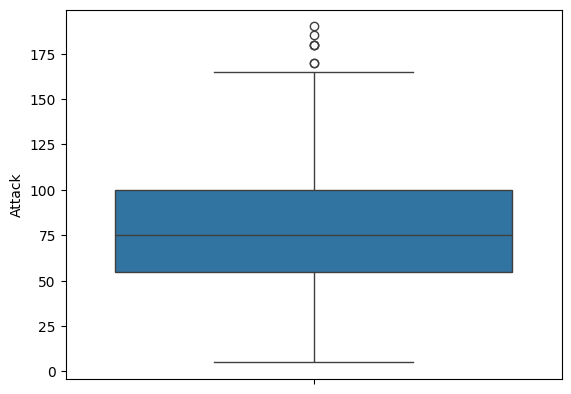

In [23]:
sns.boxplot(df['Attack'])

In [24]:
# To find the quantile region we will use the quantile function , find the IQR and then the upper and lower bounds.
Q1 = df['Attack'].quantile(0.25)
Q3 = df['Attack'].quantile(0.75)

In [25]:
IQR = Q3 - Q1

In [26]:
lower_limit = Q1 - 1.5*(IQR)
upper_limit = Q3 + 1.5*(IQR)

In [27]:
upper_limit,lower_limit

(np.float64(167.5), np.float64(-12.5))

In [28]:
# Now lets look at the outliers 
df[(df['Attack'] > upper_limit) | (df['Attack'] < lower_limit)]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Z_score_Attack,Attack_capped
#,,,,,,,,,,,,,,
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,3.419832,176.373348
214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False,3.265784,176.373348
383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,3.111736,176.373348
384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,3.111736,176.373348
386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,3.111736,176.373348
445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False,2.803639,170.000000
646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True,2.803639,170.000000


In [ ]:
# Now lets trim this into a new dataframe
new_df[''] = df[(df['Attack'] < upper_limit) & (df['Attack'] > lower_limit)]

In [32]:
len(new_df),len(df) # Verifying whether the rows were deleted or not .

(793, 800)

In [33]:
# Now lets do the capping with this 
df['Attack_capped_IQR'] = np.where(
                        df['Attack'] > upper_limit,
                        upper_limit,
                        np.where(
                            df['Attack'] < lower_limit,
                            lower_limit,
                            df['Attack']
                        )
)

In [35]:
df[(df['Attack']>upper_limit) | (df['Attack']<lower_limit)] # Verify where the columns were capped 

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Z_score_Attack,Attack_capped,Attack_capped_IQR
#,,,,,,,,,,,,,,,
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,3.419832,176.373348,167.5
214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False,3.265784,176.373348,167.5
383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,3.111736,176.373348,167.5
384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,3.111736,176.373348,167.5
386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,3.111736,176.373348,167.5
445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False,2.803639,170.000000,167.5
646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True,2.803639,170.000000,167.5


In [36]:
# Now we can use another method more simpler then this where we will decide the upper and lower limit using the quantiles of 0.99 and 0.1 respectively .
# This value will be used as Boundary for Winserization.

# Calculating the limits
upper_limit = df['Attack'].quantile(0.99)
lower_limit = df['Attack'].quantile(0.01)

In [37]:
upper_limit,lower_limit

(np.float64(165.0), np.float64(20.0))

In [ ]:
df[(df['Attack']>upper_limit) | (df['Attack']<lower_limit)] # We have a lot of values here.

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Z_score_Attack,Attack_capped,Attack_capped_IQR
#,,,,,,,,,,,,,,,
113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,-2.279952,5.000000,5.0
129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False,-2.125904,10.000000,10.0
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,3.419832,176.373348,167.5
213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False,-2.125904,10.000000,10.0
214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False,3.265784,176.373348,167.5
242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False,-2.125904,10.000000,10.0
349,Feebas,Water,NaN,200,20,15,20,10,55,80,3,False,-1.971856,15.000000,15.0
383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,3.111736,176.373348,167.5
384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,3.111736,176.373348,167.5


In [39]:
# Now lets do the capping for this values
df['Attack_capped_winserization'] = np.where(
                        df['Attack'] > upper_limit,
                        upper_limit,
                        np.where(
                            df['Attack'] < lower_limit,
                            lower_limit,
                            df['Attack']
                        )
)

In [40]:
df[(df['Attack']>upper_limit) | (df['Attack']<lower_limit)]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Z_score_Attack,Attack_capped,Attack_capped_IQR,Attack_capped_winserization
#,,,,,,,,,,,,,,,,
113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,-2.279952,5.000000,5.0,20.0
129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False,-2.125904,10.000000,10.0,20.0
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,3.419832,176.373348,167.5,165.0
213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False,-2.125904,10.000000,10.0,20.0
214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False,3.265784,176.373348,167.5,165.0
242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False,-2.125904,10.000000,10.0,20.0
349,Feebas,Water,NaN,200,20,15,20,10,55,80,3,False,-1.971856,15.000000,15.0,20.0
383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,3.111736,176.373348,167.5,165.0
384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,3.111736,176.373348,167.5,165.0


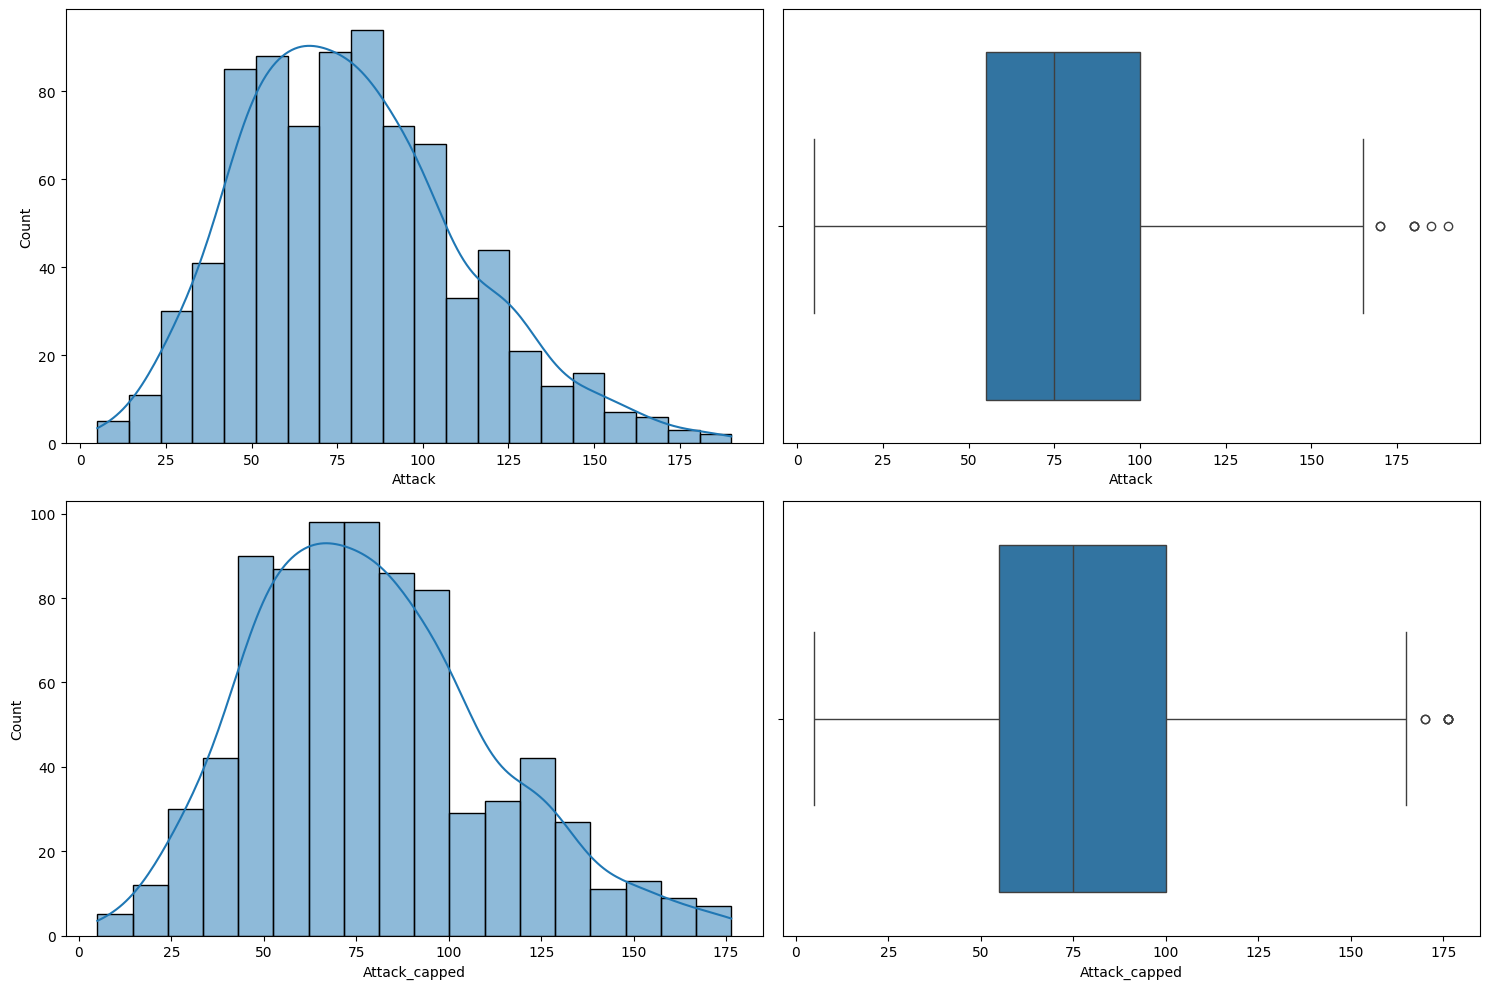

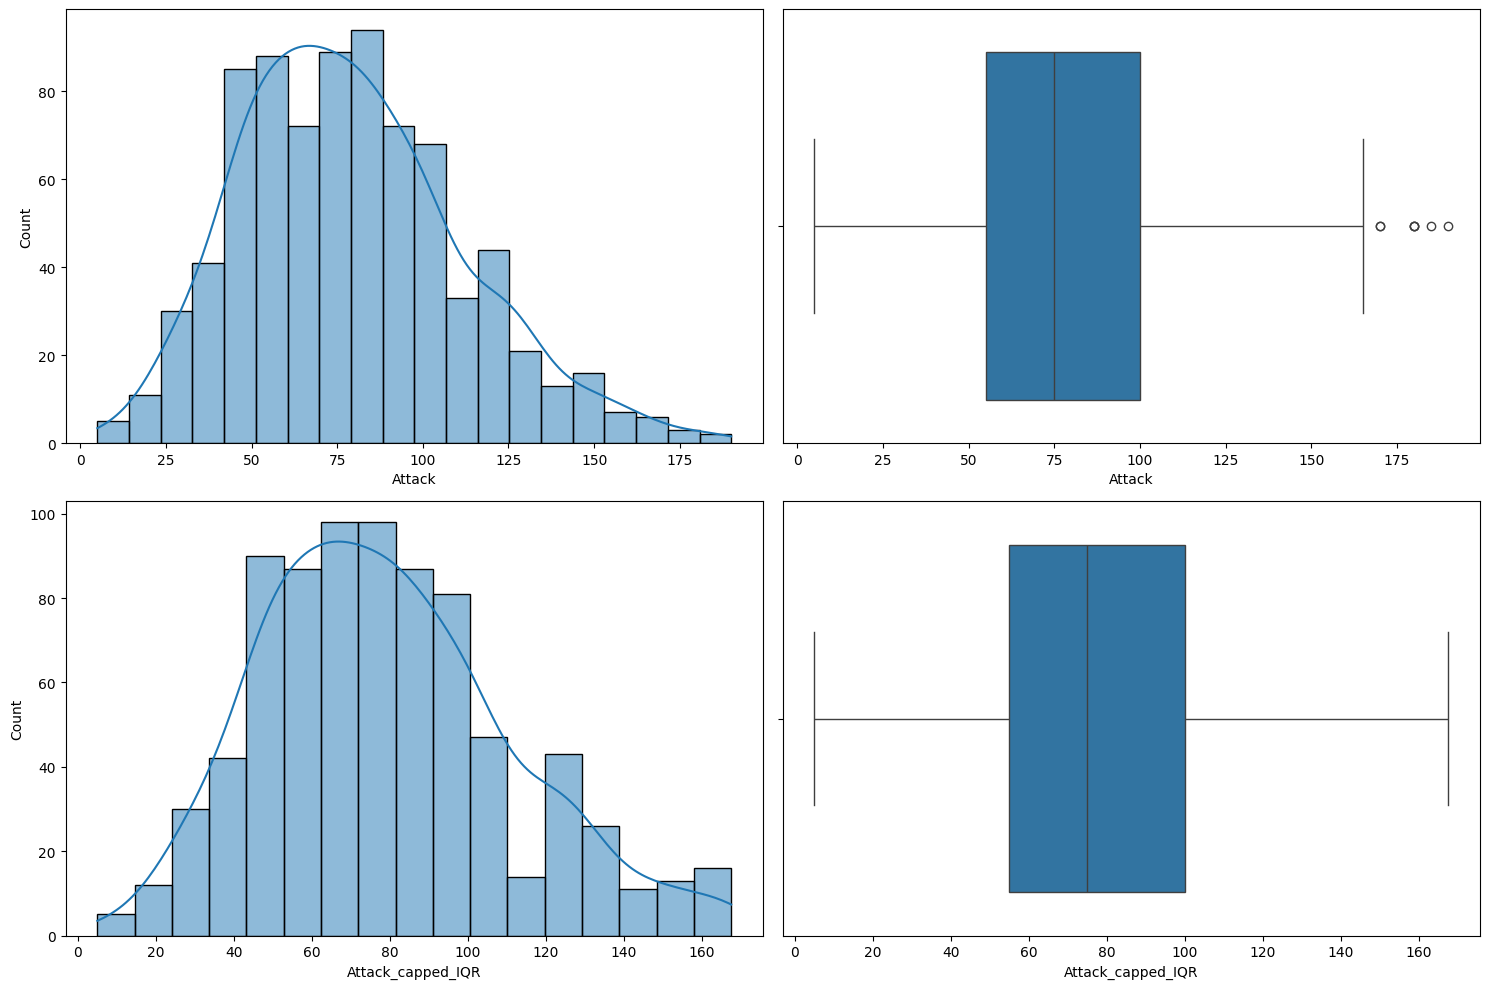

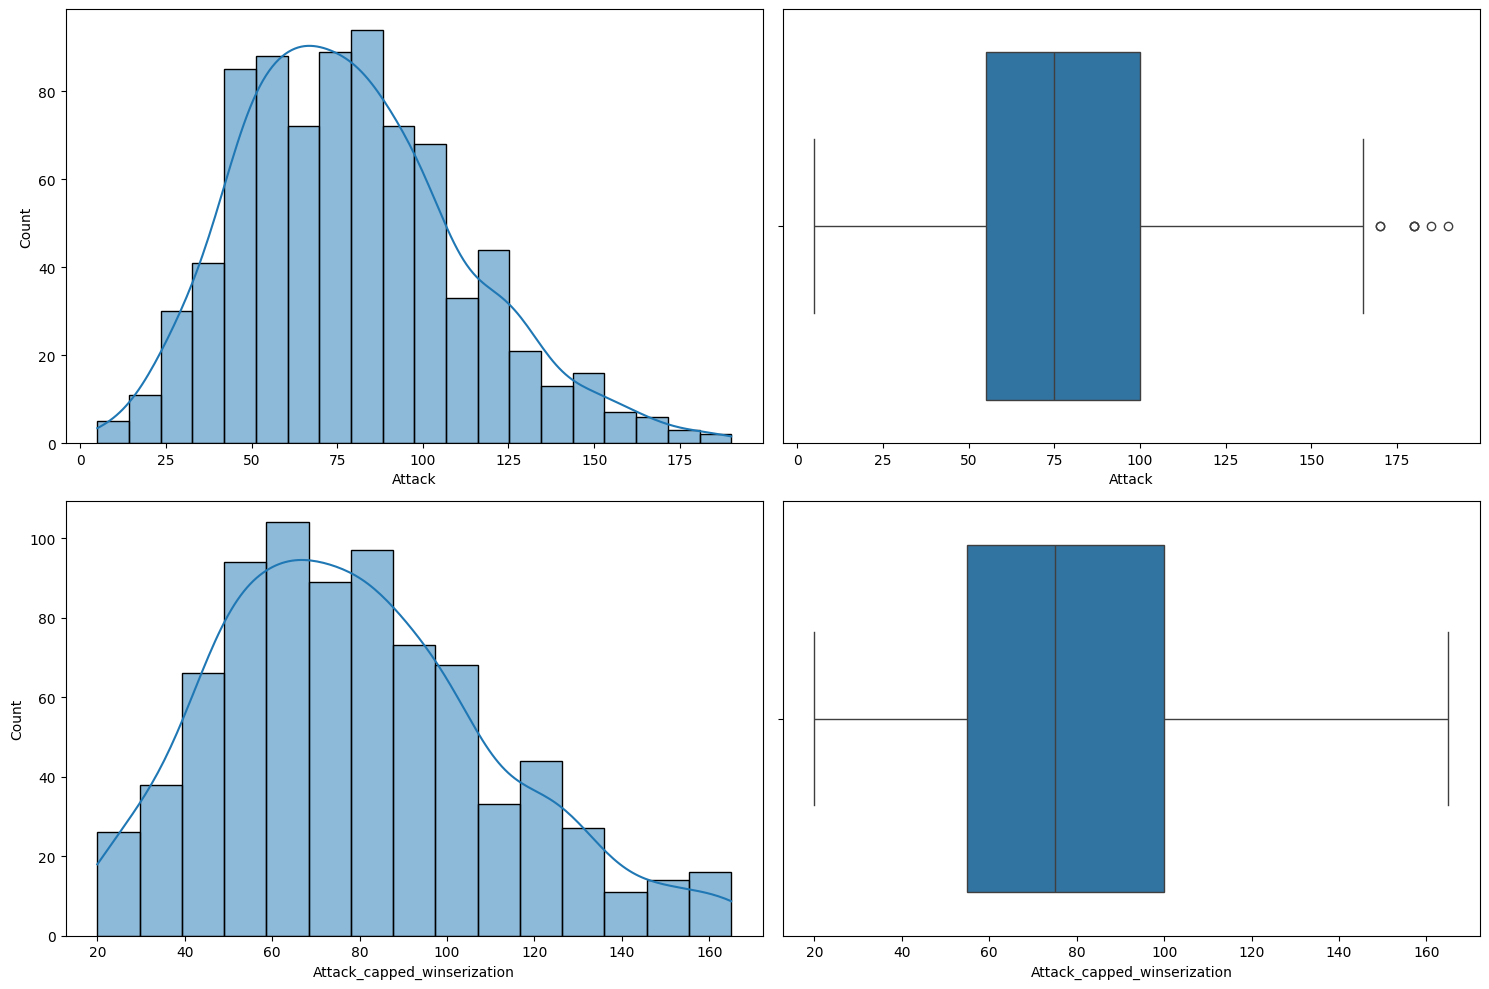

In [45]:
# Now lets analyze some different results using boxplot and displot
for x in ['Attack_capped', 'Attack_capped_IQR',
       'Attack_capped_winserization']:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    sns.histplot(df['Attack'], kde=True, ax=axes[0, 0])
    
    sns.boxplot(x=df['Attack'], ax=axes[0, 1])

    sns.histplot(df[x], kde=True, ax=axes[1, 0])
    
    sns.boxplot(x=df[x], ax=axes[1, 1])

    plt.tight_layout()
    plt.show()   


In [47]:
# From the above results we can find which method is the best for our outlier Trimming and imputation.
# Note : We have used other methods too , you can select the column like this in a for loop and also check for those too.